In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-numbers/y_test.csv
/kaggle/input/mnist-numbers/X_test.csv
/kaggle/input/mnist-numbers/y_train.csv
/kaggle/input/mnist-numbers/X_train.csv


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [33]:
# (X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
# X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [34]:
X_train = pd.read_csv("/kaggle/input/mnist-numbers/X_train.csv").to_numpy()
X_test = pd.read_csv("/kaggle/input/mnist-numbers/X_test.csv").to_numpy()
y_train = pd.read_csv("/kaggle/input/mnist-numbers/y_train.csv").to_numpy()
y_test = pd.read_csv("/kaggle/input/mnist-numbers/y_test.csv").to_numpy()

In [35]:
X_train.shape, y_train.shape

((59999, 784), (59999, 1))

In [36]:
X_test.shape, y_test.shape

((9999, 784), (9999, 1))

In [45]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
print(type(X_train))

<class 'numpy.ndarray'>


In [42]:
X_train = X_train / 255.0

In [43]:
X_test = X_test / 255.0

In [61]:
X_train[2].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [73]:
y_train[3]

array([9])

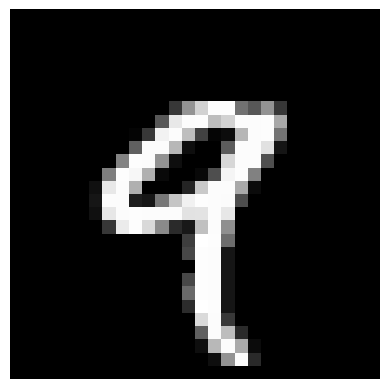

In [76]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [83]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

In [84]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [85]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [87]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8590 - loss: 0.4850 - val_accuracy: 0.9558 - val_loss: 0.1530
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9594 - loss: 0.1339 - val_accuracy: 0.9644 - val_loss: 0.1121
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0904 - val_accuracy: 0.9649 - val_loss: 0.1125
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0674 - val_accuracy: 0.9707 - val_loss: 0.1021
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9722 - val_loss: 0.0974
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0395 - val_accuracy: 0.9743 - val_loss: 0.0999
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9723 - val_loss: 0.1026
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0251 - 

In [88]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [98]:
y_prob[0]

array([9.4953531e-27, 2.8740860e-11, 9.9999994e-01, 1.8555243e-16,
       4.0803925e-29, 2.2857347e-21, 6.2357005e-24, 1.3603402e-16,
       1.1104699e-20, 0.0000000e+00], dtype=float32)

In [97]:
y_prob[0].argmax()

2

In [89]:
y_pred = y_prob.argmax(axis=1)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9744974497449745

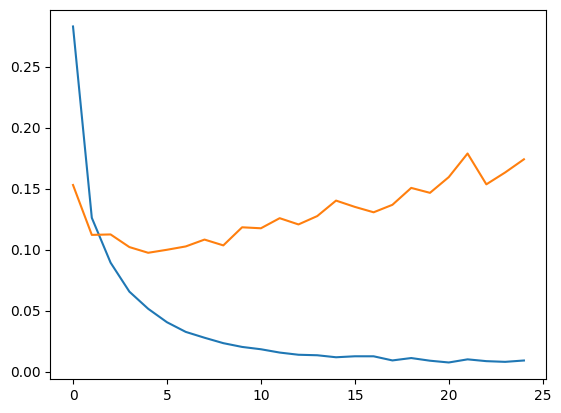

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

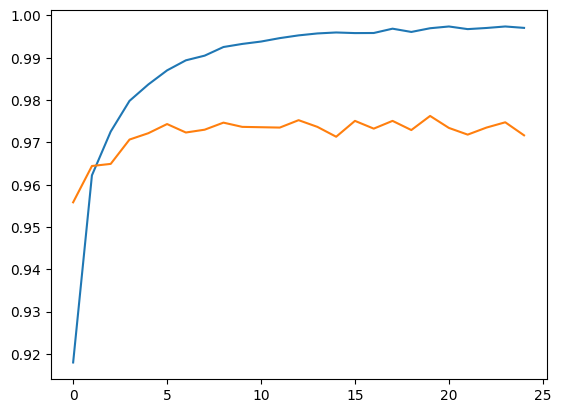

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

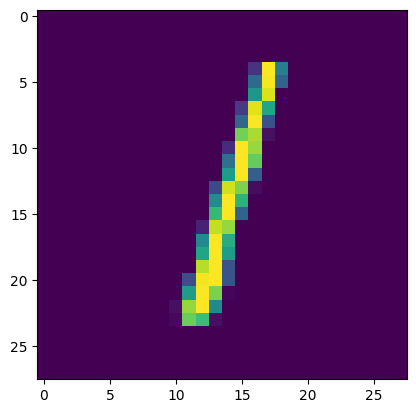

In [93]:
plt.imshow(X_test[1])

In [94]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([1])